In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
from __future__ import print_function
plt.style.use('ggplot')
np.random.seed(1)
%matplotlib nbagg

### 1. Understanding sampling using `test_lime_explainer_good_regressor_synthetic_data`

In [15]:
X, y = datasets.make_classification(n_samples=1000, n_features=20,
                                            n_informative=2, n_redundant=2, random_state=1)
print(X.shape)
print(y.shape)
print(pd.DataFrame(y).head())

(1000, 20)
(1000,)
   0
0  0
1  0
2  0
3  1
4  1


In [16]:
print(X.shape)
instance = np.random.randint(0, X.shape[0])
feature_names = ["feature" + str(i) for i in range(X.shape[1])]

(1000, 20)


In [19]:
print(feature_names)
df = pd.DataFrame(X, columns=feature_names)
df['index'] = pd.Series(list(range(len(df))))
print('Shape of original data: {}'.format(df.shape))
print(df.head(1))
print(df.columns)

['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19']
Shape of original data: (1000, 21)
   feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0 -2.045822 -0.137916 -0.080714  2.522038  0.746165 -0.906964 -0.221648   

   feature7  feature8  feature9  ...    feature11  feature12  feature13  \
0  1.014267 -0.541549  0.226619  ...     1.374085   1.009053    0.67411   

   feature14  feature15  feature16  feature17  feature18  feature19  index  
0   1.534583   0.479711  -0.912911   2.481945   0.742367   0.231548      0  

[1 rows x 21 columns]
Index([u'feature0', u'feature1', u'feature2', u'feature3', u'feature4',
       u'feature5', u'feature6', u'feature7', u'feature8', u'feature9',
       u'feature10', u'feature11', u'feature12', u'feature13', u'feature14',
       u'featu

Shape of inverse: (5000, 2)
          b  a
0  0.998434  0
1  0.308608  1
2 -2.536949  2
3 -0.893261  3
4 -1.206932  4


<IPython.core.display.Javascript object>


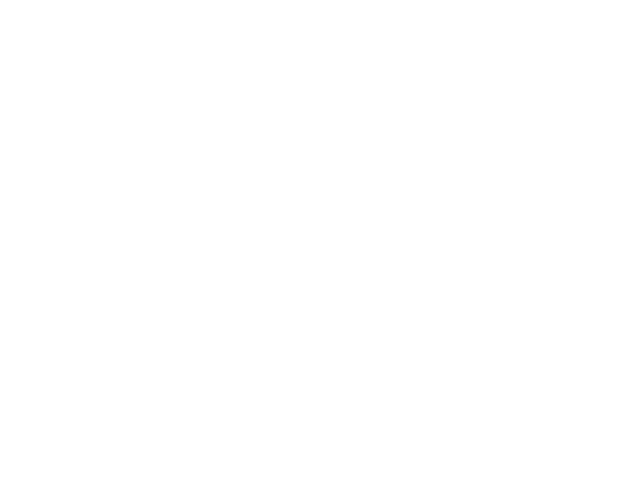

Selected Instance: -0.0919196948956


<IPython.core.display.Javascript object>


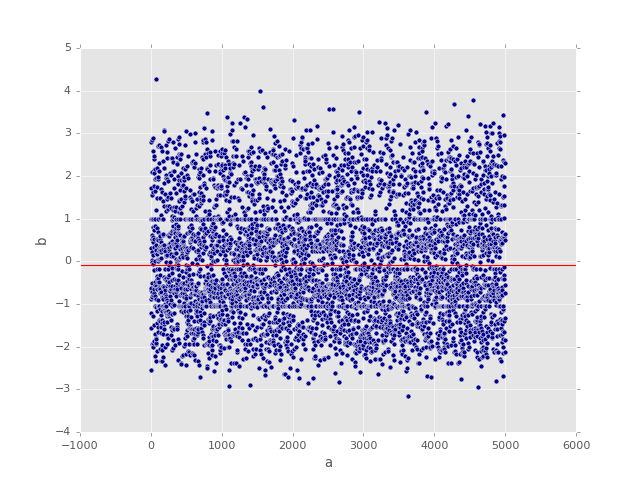

In [32]:
re_sampled_df = pd.DataFrame.from_csv('data/inversed_sample.csv')
print("Shape of inverse: {}".format(re_sampled_df.shape))
print(re_sampled_df.head())
fig = plt.figure()
df1 = df['feature0']
df2 = re_sampled_df['b']

# scatter plot
print("Selected Instance: {}".format(X[125,0]))
temp_ax = re_sampled_df.plot(kind='scatter', color="Darkblue", x='a', y='b')
temp_ax.axhline(X[125,0], color='red')

<IPython.core.display.Javascript object>


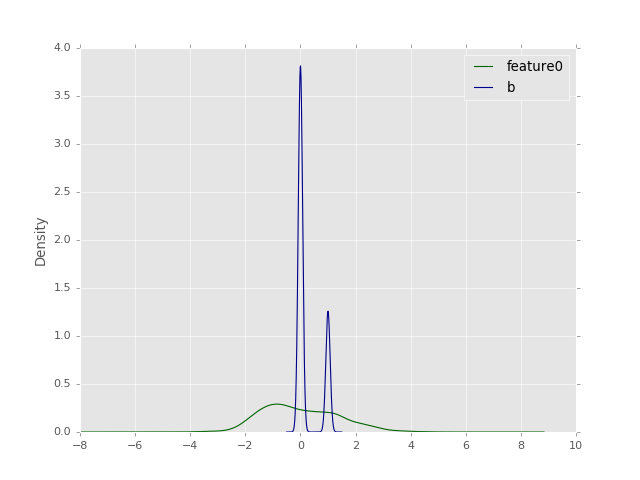

count    1000.000000
mean       -0.004581
std         1.354849
min        -3.761544
25%        -1.052429
50%        -0.170901
75%         1.003103
max         4.636961
Name: feature0, dtype: float64
count    5000.000000
mean        0.248200
std         0.432012
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: b, dtype: float64


In [27]:
# histogram plots
ax = fig.add_subplot(212)
_ = ax.hist(df2.values, color='blue', alpha=0.2)
_ = ax.hist(df1.values, color='red', alpha=0.9)

# density plots
ax1 = df.plot(kind='density', color="DarkGreen", x='index', y='feature0')
re_sampled_df.plot(kind='density', color="Darkblue", x='a', y='b', ax=ax1)

#ax1 = plt.twinx()
#df1.plot(kind='kde', ax=ax1, color='blue')
#df2.plot(kind='kde', ax=ax1, color='green')
print(df1.describe())
print(re_sampled_df['b'].describe())
#df.plot(kind='density', color="DarkBlue", x='index', y='feature0')